# Challenge 5.5.4: What Test to Use

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind, kruskal, wilcoxon
%matplotlib inline

In [2]:
# Import data and sort by deadline date
ess = pd.read_csv("ESSdata_Thinkful.csv")

# Replace dataframe values with actual values for better visualization
ess['year'] = ess['year'].map({6: 2012, 7: 2014})
ess['gndr'] = ess['gndr'].map({1: 'Male', 2: 'Female'})
ess['partner'] = ess['partner'].map({1: 'Together', 2: 'Alone'})
ess['cntry'] = ess['cntry'].map({'CH': 'Switzerland',
                                'CZ': 'Czech Republic',
                                'DE': 'Denmark',
                                'ES': 'Spain',
                                'NO': 'Norway',
                                'SE': 'Sweden'})

In [3]:
# Preview the data
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,Switzerland,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,Female,60.0,Together
1,Switzerland,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,Female,59.0,Together
2,Switzerland,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,Male,24.0,Alone
3,Switzerland,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,Female,64.0,Together
4,Switzerland,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,Female,55.0,Together


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002347A2C4908>,
      dtype=object)

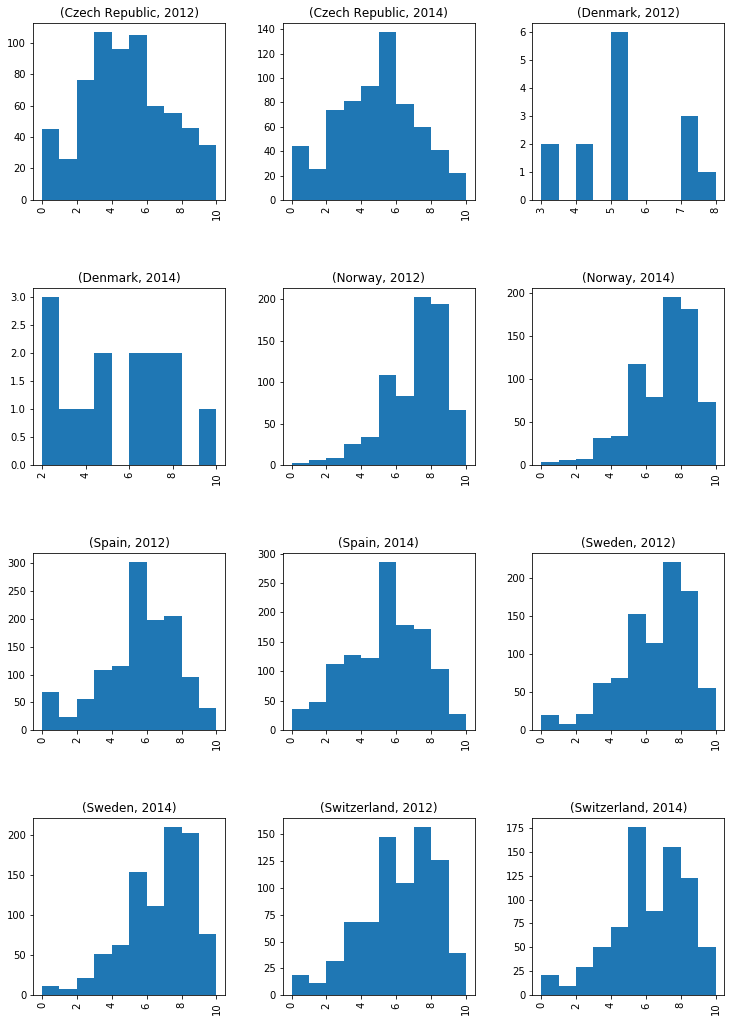

In [4]:
plt.rcParams['figure.figsize'] = [12,18]

ess.hist(by=['cntry', 'year'], column='ppltrst')

In [5]:
ess2 = ess.dropna()

# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=ess2['ppltrst'],      
                          groups=ess2['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,lower,upper,reject
Czech Republic,Denmark,0.8428,-0.3146,2.0001,False
Czech Republic,Norway,2.2445,2.0116,2.4773,True
Czech Republic,Spain,0.6555,0.4439,0.867,True
Czech Republic,Sweden,1.7625,1.5393,1.9857,True
Czech Republic,Switzerland,1.346,1.1151,1.5768,True
Denmark,Norway,1.4017,0.2463,2.5572,True
Denmark,Spain,-0.1873,-1.3386,0.964,False
Denmark,Sweden,0.9197,-0.2338,2.0733,False
Denmark,Switzerland,0.5032,-0.6518,1.6582,False
Norway,Spain,-1.589,-1.7899,-1.3882,True


In order to determine normality, we can take a few approaches. The first is to examine the histograms, and determine if the distributions look roughly equal. The second approach is to run a tukey test to compare all of the distributions to each other.

By running a tukey test on the people's trust by country for both years, it appears as though the majority of the distributions in our population are not normal. Also, since all participants were tested in both 2012 and 2014, we have an A/B test where all participants experience both versions. This means that the test that we will want to use is a Wilcoxon signed-rank test.

In [6]:
# Create a list for the countries
countries = ess['cntry'].unique().tolist()

# Print wilcoxon result for each country
for country in countries:
    ppltrst_2012 = (ess.loc[(ess['year']==2012) & (ess['cntry']==country)])['ppltrst']
    ppltrst_2014 = (ess.loc[(ess['year']==2014) & (ess['cntry']==country)])['ppltrst']
    
    trst_avg_2012 = ((ess.loc[(ess['year']==2012) & (ess['cntry']==country)])['ppltrst']).mean()
    trst_avg_2014 = ((ess.loc[(ess['year']==2014) & (ess['cntry']==country)])['ppltrst']).mean()
    
    print(country, '\t', wilcoxon(ppltrst_2012,ppltrst_2014))
    print('\n', trst_avg_2012, '\t', trst_avg_2014, '\n')

Switzerland 	 WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

 5.677878395860285 	 5.751617076326003 

Czech Republic 	 WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

 4.362519201228879 	 4.424657534246576 

Denmark 	 WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

 5.214285714285714 	 5.357142857142857 

Spain 	 WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

 5.114591920857379 	 4.895127993393889 

Norway 	 WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

 6.64931506849315 	 6.598630136986301 

Sweden 	 WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)

 6.058498896247241 	 6.257709251101321 



C:\Users\nu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\nu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


So, based on a 5% confidence interval, the only countries with a meaningful difference are Spain and Sweden (5%>confidence interval). Based on the averages for those two countries, it would appear as though 
* Spain is less trustful by about -0.22 points, and 
* Sweden is more trustful by about +0.20 points.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002347B6FDA58>,
      dtype=object)

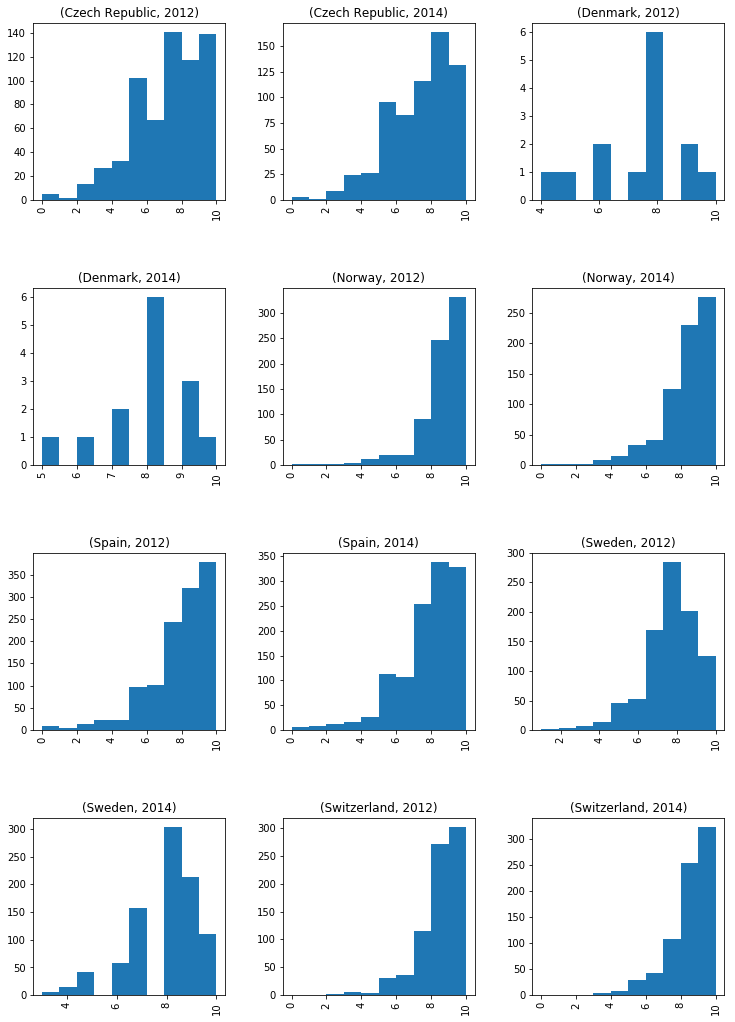

In [7]:
plt.rcParams['figure.figsize'] = [12,18]

ess.hist(by=['cntry', 'year'], column='happy')

In [8]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=ess2['happy'],      
                          groups=ess2['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,lower,upper,reject
Czech Republic,Denmark,0.7359,-0.1888,1.6607,False
Czech Republic,Norway,1.2292,1.0432,1.4153,True
Czech Republic,Spain,0.6481,0.4791,0.8171,True
Czech Republic,Sweden,1.0634,0.8851,1.2417,True
Czech Republic,Switzerland,1.2566,1.0721,1.441,True
Denmark,Norway,0.4933,-0.4299,1.4166,False
Denmark,Spain,-0.0878,-1.0077,0.8322,False
Denmark,Sweden,0.3275,-0.5943,1.2492,False
Denmark,Switzerland,0.5206,-0.4023,1.4435,False
Norway,Spain,-0.5811,-0.7416,-0.4206,True


By running a tukey test on the people's happiness by country for both years, it's a bit more mixed, but leaning slightly towards non-normal, so it looks like we'll once again have to use a Wilcoxon signed-rank test.

In [9]:
# Print wilcoxon result for each country
for country in countries:
    pplhappy2012 = (ess.loc[(ess['year']==2012) & (ess['cntry']==country)])['happy']
    pplhappy2014 = (ess.loc[(ess['year']==2014) & (ess['cntry']==country)])['happy']
    happy_avg_2012 = ((ess.loc[(ess['year']==2012) & (ess['cntry']==country)])['happy']).mean()
    happy_avg_2014 = ((ess.loc[(ess['year']==2014) & (ess['cntry']==country)])['happy']).mean()
    
    print(country, '\t', wilcoxon(pplhappy2012,pplhappy2014))
    print('\n', happy_avg_2012, '\t', happy_avg_2014, '\n')

Switzerland 	 WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

 8.088311688311688 	 8.116429495472186 

Czech Republic 	 WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

 6.7708978328173375 	 6.914110429447852 

Denmark 	 WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

 7.428571428571429 	 7.857142857142857 

Spain 	 WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

 7.548679867986799 	 7.41996699669967 

Norway 	 WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

 8.25171939477304 	 7.9151846785225715 

Sweden 	 WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)

 7.907386990077177 	 7.946961325966851 



C:\Users\nu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\nu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


So, based on a 5% confidence interval, the only countries with a meaningful difference are Czech Republic and Spain (5%>confidence interval). Based on the averages for those two countries, it would appear as though 
* Spain is less happy by about -0.13 points, and 
* Czech Republic is happier by about +0.14 points.

### 3. Who reported watching more TV in 2012, men or women?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002347BC016A0>,
      dtype=object)

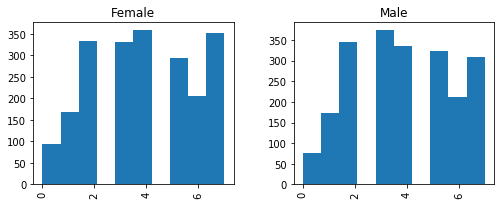

In [10]:
plt.rcParams['figure.figsize'] = [8,3]

(ess.loc[(ess['year']==2012)]).hist(by=['gndr'], column='tvtot')

In [11]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=ess2['tvtot'],      
                          groups=ess2['gndr'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,lower,upper,reject
Female,Male,-0.072,-0.1593,0.0152,False


By running a tukey test on the distribution of tv time, separated by gender, it appears as though they do have a normal distrubtion. Since this entire experiment is an A/B test, we will use a t-test to compare the two groups.

In [12]:
# Run t-test in order to see if the two groups are significantly different
ttest_ind((ess2.loc[(ess2['year']==2012) & (ess2['gndr']=='Male')])['tvtot'],
        (ess2.loc[(ess2['year']==2012) & (ess2['gndr']=='Female')])['tvtot'],
         equal_var=False)

Ttest_indResult(statistic=-0.7321850526951791, pvalue=0.46409787829722293)

In [13]:
# Compute average tv time for men and women in 2012
tv_men = ((ess.loc[(ess['year']==2012) & (ess['gndr']=='Male')])['tvtot']).mean()
tv_women = ((ess.loc[(ess['year']==2012) & (ess['gndr']=='Female')])['tvtot']).mean()

print("Men: {} \nWomen: {}".format(tv_men, tv_women))

Men: 3.901906090190609 
Women: 3.944392523364486


Based on our tests, it would appear as though men and women are statistically different, and women on average, watched tv slightly longer.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002347C216978>,
      dtype=object)

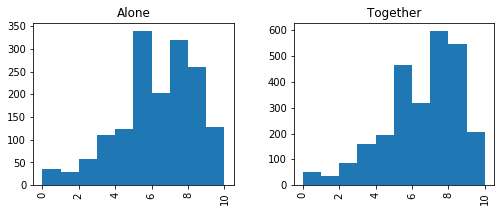

In [14]:
plt.rcParams['figure.figsize'] = [8,3]

(ess.loc[(ess['year']==2012)]).hist(by=['partner'], column='pplfair')

In [15]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=ess2['pplfair'],      
                          groups=ess2['partner'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,lower,upper,reject
Alone,Together,0.1484,0.0538,0.243,True


Based on the results of our histogram and tukey test, these distributions are clearly not normal, and since the variables that we want to measure are two independent groups, we will be using a Kruskal-Wallace test.

In [43]:
# Print Mood's Median test result for both domestic statuses
alone_2012 = (ess.loc[(ess['year']==2012) & (ess['partner']=='Alone')])['pplfair']
together_2012 = (ess.loc[(ess['year']==2012) & (ess['partner']=='Together')])['pplfair']
    
kruskal(alone_2012, together_2012, nan_policy='omit')

KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)

Based on the results of our test, it would appear as though there is no significant difference between the two groups.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002347C28D2E8>,
      dtype=object)

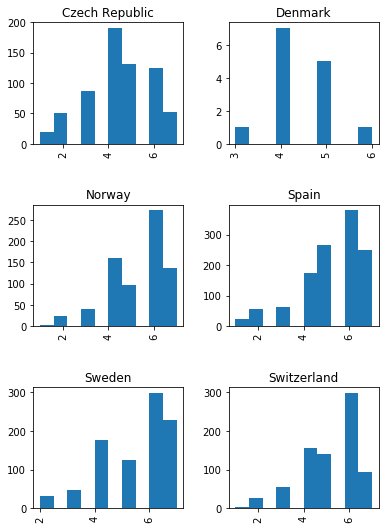

In [17]:
plt.rcParams['figure.figsize'] = [6,9]

(ess.loc[(ess['year']==2014)]).hist(by=['cntry'], column='sclmeet')

In [44]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=ess2['sclmeet'],      
                          groups=ess2['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,lower,upper,reject
Czech Republic,Denmark,0.0536,-0.7292,0.8363,False
Czech Republic,Norway,0.8235,0.666,0.981,True
Czech Republic,Spain,0.6295,0.4864,0.7726,True
Czech Republic,Sweden,0.8724,0.7215,1.0234,True
Czech Republic,Switzerland,0.5367,0.3806,0.6929,True
Denmark,Norway,0.77,-0.0115,1.5514,False
Denmark,Spain,0.5759,-0.2028,1.3546,False
Denmark,Sweden,0.8188,0.0387,1.599,True
Denmark,Switzerland,0.4832,-0.298,1.2644,False
Norway,Spain,-0.194,-0.3299,-0.0582,True


### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002347CDFA898>,
      dtype=object)

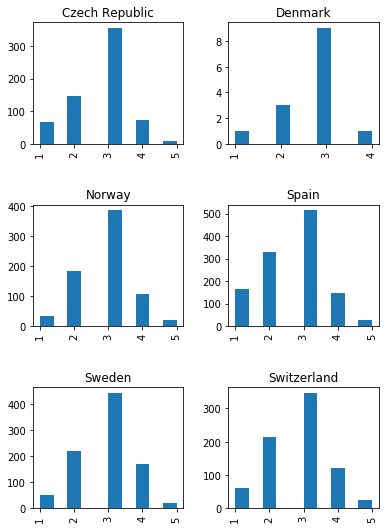

In [46]:
plt.rcParams['figure.figsize'] = [6,9]

(ess.loc[(ess['year']==2014)]).hist(by=['cntry'], column='sclact')

In [47]:
# Run normality test to determine what test to use
tukey = pairwise_tukeyhsd(endog=ess2['sclact'],      
                          groups=ess2['cntry'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,lower,upper,reject
Czech Republic,Denmark,0.1412,-0.3539,0.6363,False
Czech Republic,Norway,0.2405,0.1409,0.3401,True
Czech Republic,Spain,-0.0723,-0.1628,0.0181,False
Czech Republic,Sweden,0.2216,0.1261,0.317,True
Czech Republic,Switzerland,0.0742,-0.0245,0.173,False
Denmark,Norway,0.0993,-0.395,0.5936,False
Denmark,Spain,-0.2136,-0.7061,0.2789,False
Denmark,Sweden,0.0803,-0.4132,0.5738,False
Denmark,Switzerland,-0.067,-0.5611,0.4271,False
Norway,Spain,-0.3129,-0.3988,-0.2269,True
